## Loading pregenerated signals

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

from scipy.io import loadmat

import numpy as np

import matplotlib.pyplot as plt

from collections import defaultdict

# import pyvista as pv

In [3]:
names = ['nossnoMF', 'nossMF', 'ssMF', 'ssnoMF']

data = {
    key: loadmat(f'../tests/data/DataSet_{key}.mat')['data'].transpose() for key in names
}

param = {
    key: loadmat(f'../tests/data/DataSet_{key}.mat')['params'] for key in names
}

param = {
    key: {
        param[key].dtype.names[i]: param[key][0, 0][i] for i in range(len(param[key][0, 0]))
    }
    for key in param
}

In [4]:
data['nossnoMF']

array([[ 8.11090608, -0.9774847 ],
       [ 4.73543264, -2.00457855],
       [ 5.73053886, -2.04838912],
       ...,
       [-0.08089563, -0.34514748],
       [ 0.46798955,  0.81719877],
       [-0.6714437 , -0.38443447]])

In [5]:
key = 'nossnoMF'

In [6]:
X = data[key].copy()

j1 = 3
j2 = 8
p_exp=2
gamint = 1

scaling_ranges = [(j1, j2)]

In [40]:
from pymultifracs import wavelet_analysis
from pymultifracs.bivariate import bimfa

In [41]:
WT = wavelet_analysis(X)

In [42]:
WT = WT.auto_integrate(scaling_ranges)

In [52]:
lwt = bimfa(WT, WT, scaling_ranges, q1=[0, 1, 2], q2=[0, 1, 2])

In [46]:
WT.get_values(10).shape

(258, 1, 2)

In [50]:
lwt.structure.slope.shape

(3, 3, 1, 4)

In [42]:
def plot_key(key, plot=True):
    
    X = data[key].copy()

    j1 = 3
    j2 = 8
    p_exp=2
    gamint = 1

    scaling_ranges = [(j1, j2)]

    dwt, lwt = bivariate_analysis_full(
        X[:, 0], X[:, 1], scaling_ranges, p_exp=p_exp, gamint=gamint,
        weighted=None, n_cumul=2, q1=np.array([0, 1, 2]),
        q2=np.array([0, 1, 2]), R=1)

    if not plot:
        return dwt, lwt
    
    print(f'{lwt.cumulants.rho_mf=}')
    print(f'{lwt.cumulants.c20}')
    print(f'{lwt.cumulants.c02}')

    lwt.cumulants.plot(j1=j1)
    # fig_m.suptitle(key)
    # fig_c.suptitle(key)
    # lwt.cumulants.plot_legendre(resolution=30)
    # plt.suptitle(key)
    # plt.show()
    
    plt.figure()
    plt.plot(dwt.structure.j, dwt.structure.coherence, label='second order (wavelet) coherence')
    plt.plot(lwt.cumulants.j, lwt.cumulants.RHO_MF, label=r'multifractal (leader) coherence')
    plt.xlabel('j')
    plt.title(key)
    plt.legend()
    plt.show()

    # lwt.cumulants.plot_legendre_pv()
    
    return dwt, lwt

In [43]:
from pymultifracs.viz import plot_bicm

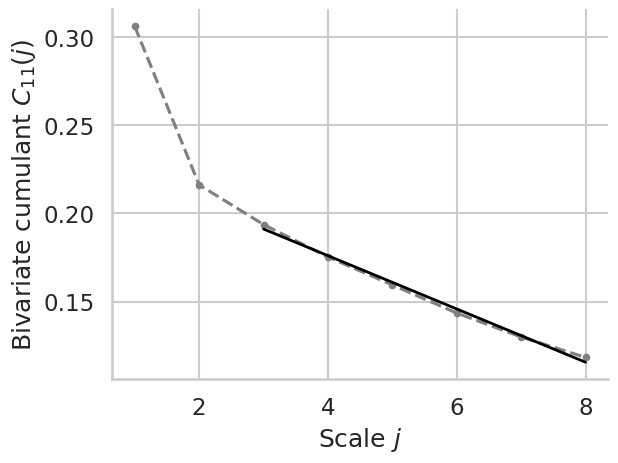

In [57]:
sns.set_context('talk')
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)
plot_bicm(l.cumulants, 1, 1, 1, None, 0, ax, zorder=1)
ax.set(xlabel='Scale $j$', ylabel='Bivariate cumulant $C_{11}(j)$')
sns.despine()

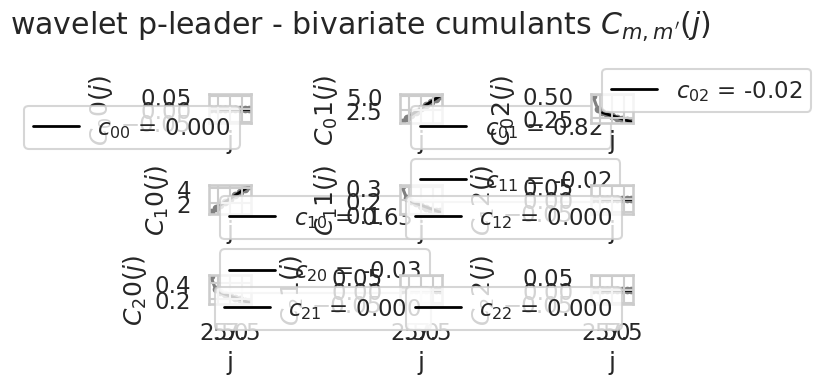

In [15]:
l.cumulants.plot()

lwt.cumulants.rho_mf=array([0.74609284])
[-0.03122621]
[-0.02731063]


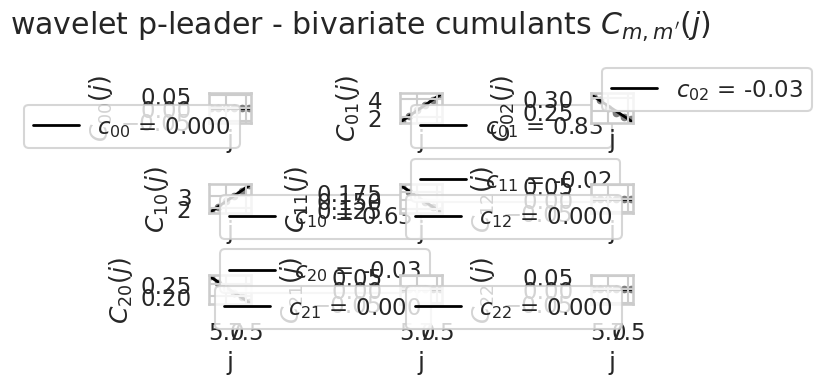

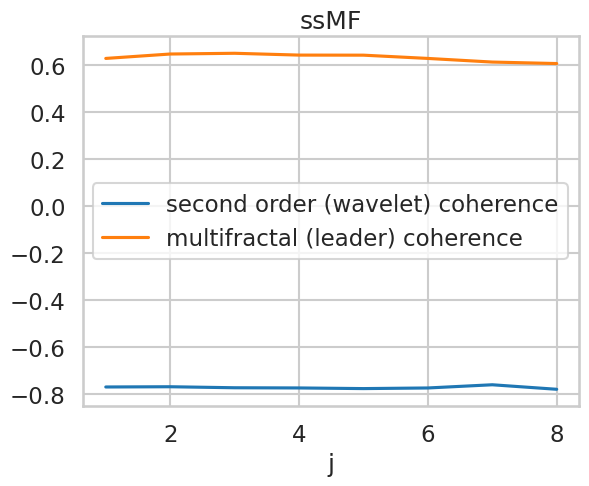

In [40]:
d, l = plot_key('ssMF')

lwt.cumulants.rho_mf=array([-0.07785503])
[-0.03505511]
[-0.0354132]


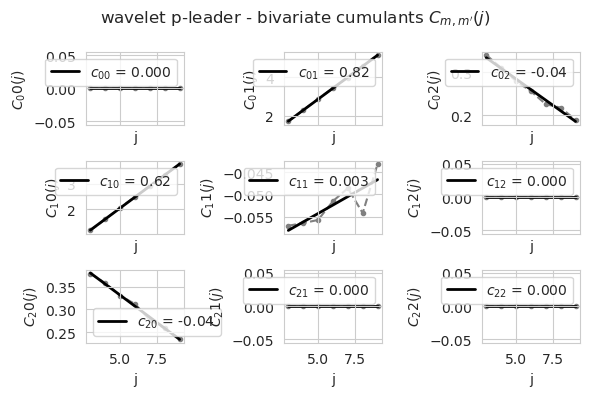

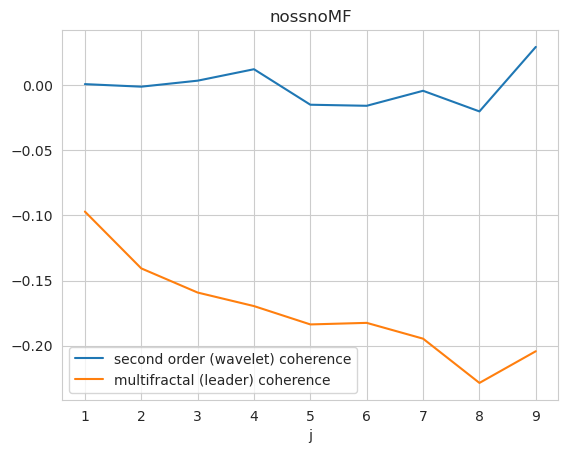

lwt.cumulants.rho_mf=array([0.80463939])
[-0.02827499]
[-0.02980695]


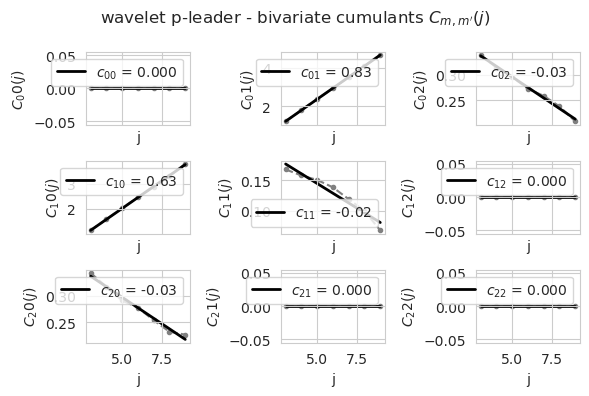

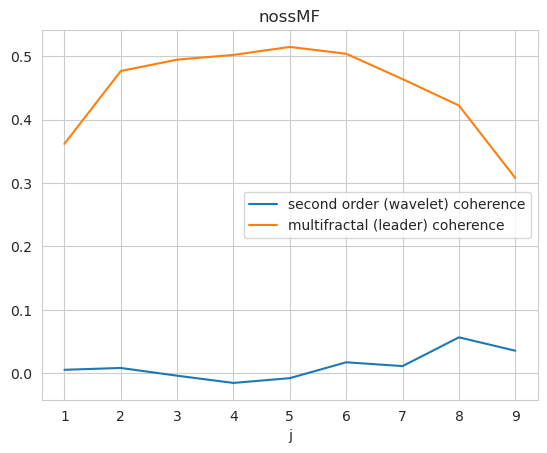

lwt.cumulants.rho_mf=array([0.69728482])
[-0.03002242]
[-0.02489817]


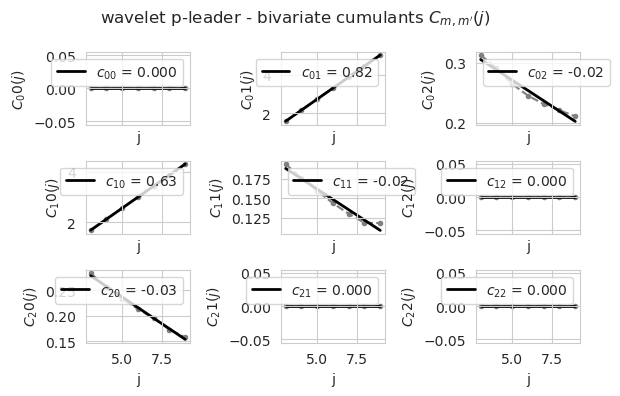

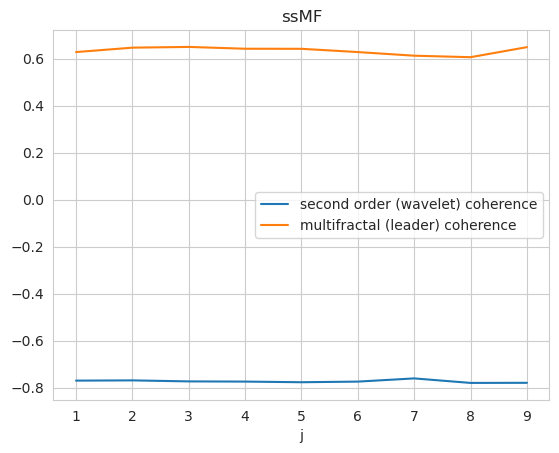

lwt.cumulants.rho_mf=array([-0.09315478])
[-0.02741859]
[-0.02453828]


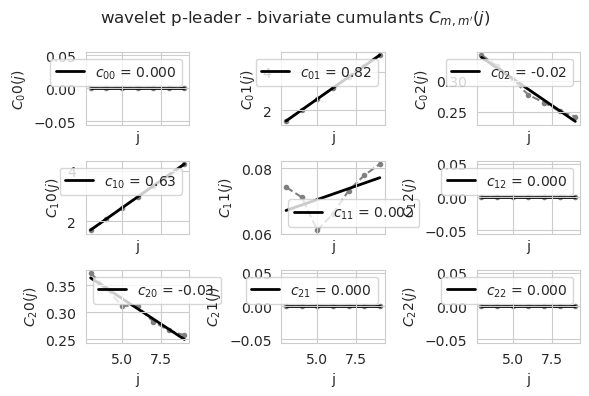

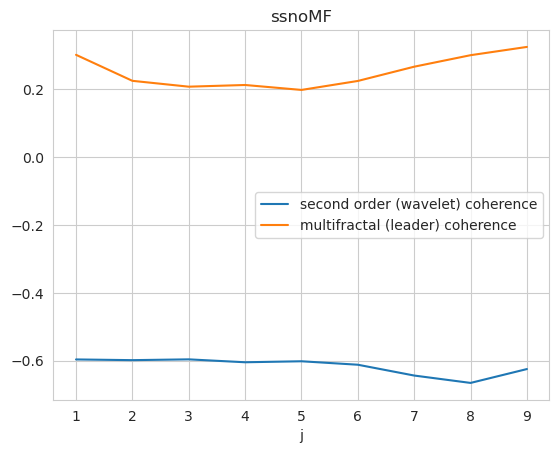

In [11]:
for key in data:
    plot_key(key)